In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML

In [3]:
import visualize
import world_generator
import evaluation
import projections

In [17]:
# enable animations to render inline.
# requires ffmpeg to be installed (`sudo apt install ffmpeg`)
rc('animation', html='html5')

In [4]:
N_a, M_a, g_ba = world_generator.generate_world(num_regions=256, spread_rate=0.2, self_spread_rate=2.0)
N_a, M_a, g_ba

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [5]:
N_a.shape, M_a.shape, g_ba.shape

((256,), (256, 256), (64, 256))

In [6]:
grid_N_a_0 = visualize.as_grid(N_a)
grid_N_a_0.shape

(16, 16)

In [7]:
results = evaluation.evaluate(M_a, projection_method=projections.Projections().sub_matrix_eigenvector, g_bas=[g_ba], N_a_0=N_a, num_steps=10, intervention_strategy=False)

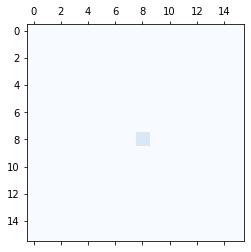

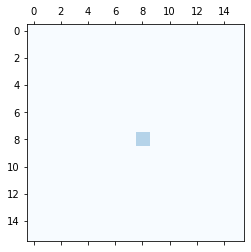

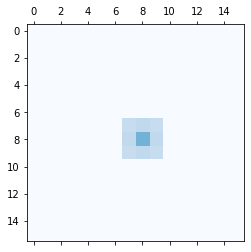

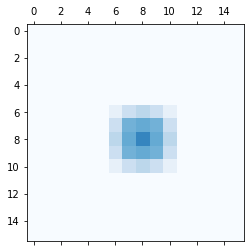

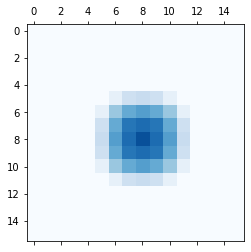

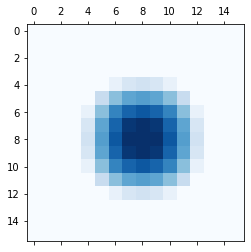

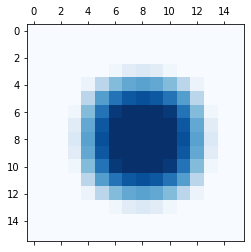

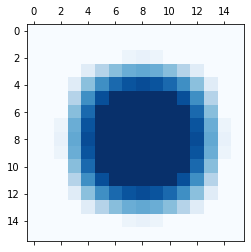

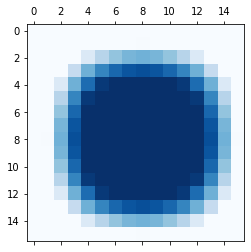

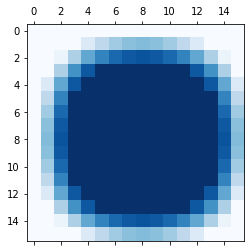

In [8]:
for t, N_a_t in enumerate(results['N_a']):
    grid_N_a_t = visualize.as_grid(N_a_t)
    visualize.plot_grid(grid_N_a_t, grid_N_a_t)

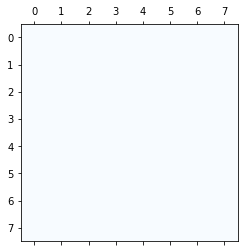

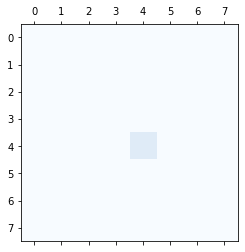

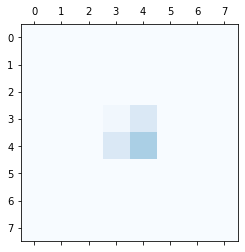

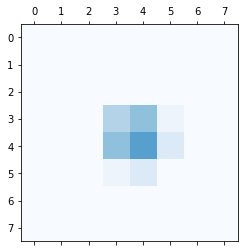

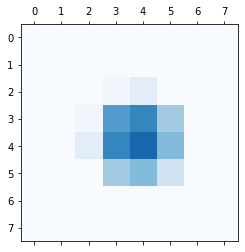

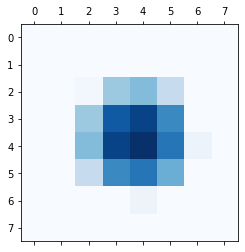

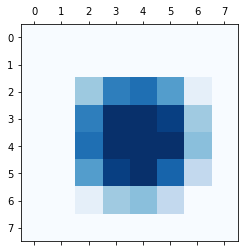

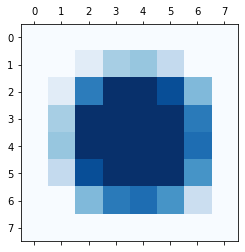

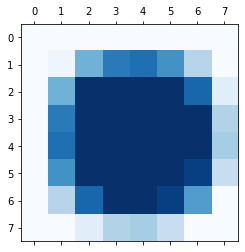

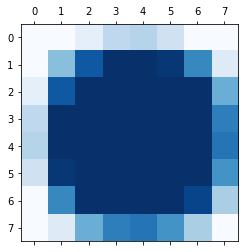

In [9]:
for t, N_b_t in enumerate(results['N_bs'][1]):
    grid_N_b_t = visualize.as_grid(N_b_t)
    visualize.plot_grid(grid_N_b_t, grid_N_a_t)

In [10]:
results = evaluation.evaluate(M_a, projection_method=projections.Projections().sub_matrix_eigenvector, g_bas=[g_ba], N_a_0=N_a, num_steps=10,  lock_down_threshold=10, re_open_threshold=0.5, intervention_strategy=True)

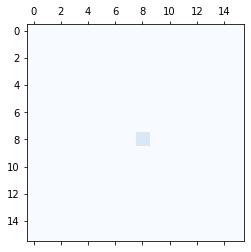

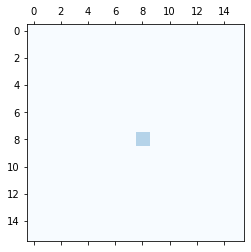

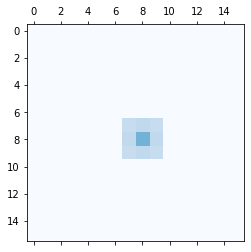

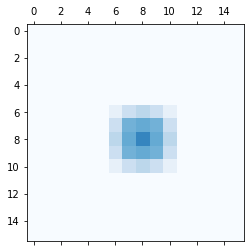

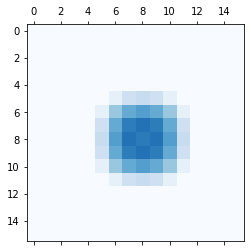

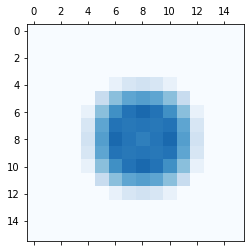

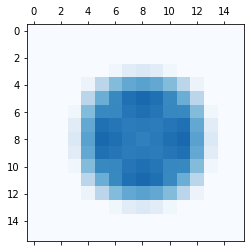

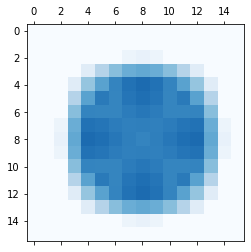

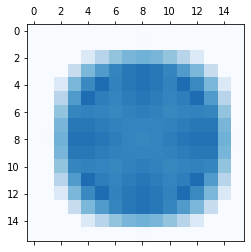

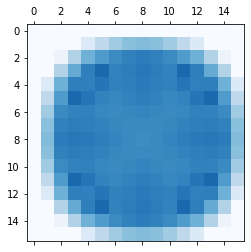

In [11]:
for t, N_a_t in enumerate(results['N_a']):
    grid_N_a_t = visualize.as_grid(N_a_t)
    visualize.plot_grid(grid_N_a_t, grid_N_a_t)

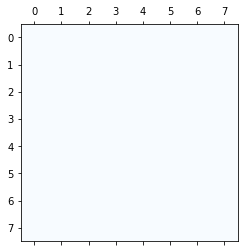

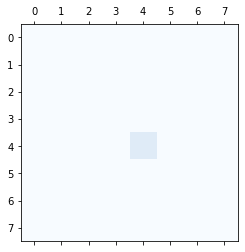

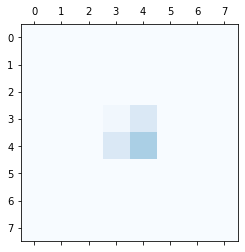

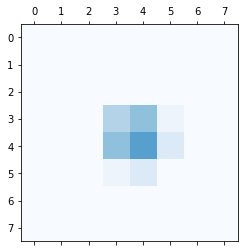

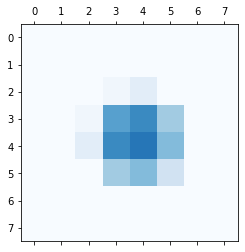

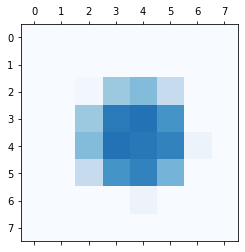

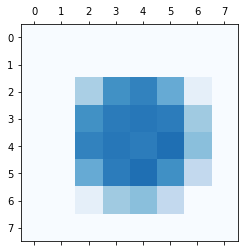

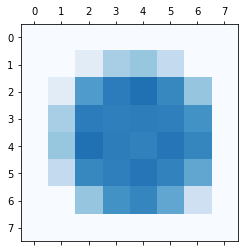

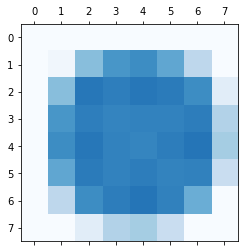

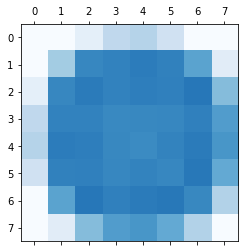

In [12]:
for t, N_b_t in enumerate(results['N_bs'][1]):
    grid_N_b_t = visualize.as_grid(N_b_t)
    visualize.plot_grid(grid_N_b_t, grid_N_a_t)

In [13]:
#M_b_0 # M_a   --> element-wise multiply entries {(i, j)} by \delta M_b  < 1 as a function of N_a
#M_b_1 #        --> 
#...
#M_b_n

# Dummy Animation

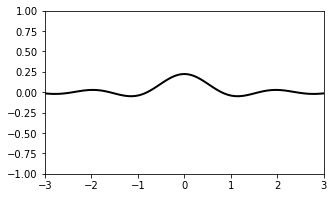

In [14]:
visualize.dummy_animate()

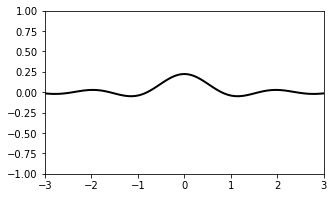

In [15]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.set(xlim=(-3, 3), ylim=(-1, 1))

x = np.linspace(-3, 3, 91)
t = np.linspace(1, 25, 30)
X2, T2 = np.meshgrid(x, t)

sinT2 = np.sin(2*np.pi*T2/T2.max())
F = 0.9*sinT2*np.sinc(X2*(1 + sinT2))

line = ax.plot(x, F[0, :], color='k', lw=2)[0]

def animate(i):
    line.set_ydata(F[i, :])

anim = FuncAnimation(
    fig, animate, interval=100, frames=len(t)-1)

#plt.draw()
#plt.show()
#fig.show()

In [19]:
# render animation
# requires ffmpeg to be installed (`sudo apt install ffmpeg` if this line fails)
anim